<a href="https://colab.research.google.com/github/SSidharth2/Redwine-Quality-EDA-Project/blob/main/analysis_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Predicting Wine Quality with Several Classification Techniques
A data science project walkthrough with code!

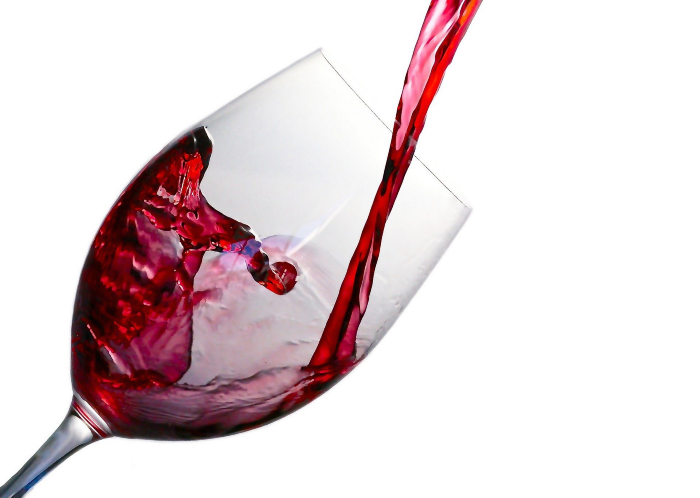

### For this project, I used Kaggle’s Red Wine Quality dataset to build various classification models to predict whether a particular red wine is “good quality” or not. Each wine in this dataset is given a “quality” score between 0 and 10. For the purpose of this project, I converted the output to a binary output where each wine is either “good quality” (a score of 7 or higher) or not (a score below 7). The quality of a wine is determined by 11 input variables:
Fixed acidity
Volatile acidity
Citric acid
Residual sugar
Chlorides
Free sulfur dioxide
Total sulfur dioxide
Density
pH
Sulfates
Alcohol
Objectives
The objectives of this project are as follows
To experiment with different classification methods to see which yields the highest accuracy
To determine which features are the most indicative of a good quality wine
With that said, here we go!

## Setup
First, I imported all of the relevant libraries that I’ll be using as well as the data itself.

In [18]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [19]:
# Reading Data
df_wine = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Description of the Dataset

This dataset provides information about wine's ingredient like citric acid, chlorides, sulfur dioxide, density, PH, alcohol etc.
##Column Name	Description
fixed acidity	most acids involved with wine or fixed or nonvolatile (do not evaporate readily).
volatile acidity	the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
citric acid	found in small quantities, citric acid can add ‘freshness’ and flavor to wines
residual sugar	the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.
chlorides	the amount of salt in the wine.
free sulfur dioxide	free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion;it prevents microbial growth and the oxidation of wine.
total sulfur dioxide	amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
density	the density of water is close to that of water depending on the percent alcohol and sugar content
pH	describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
sulphates	a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.
alcohol	the percent alcohol content of the wine.
quality	score between 0 to 10.

## Understanding Data
Next, I wanted to get a better idea of what I was working with.

In [20]:
# See the number of rows and columns
print("Rows, columns: " + str(df.shape))

# See the first five rows of the dataset
df.head()


Rows, columns: (6497, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### There are a total of 1599 rows and 12 columns. The data looks very clean by looking at the first five rows, but I still wanted to make sure that there were no missing values.

In [21]:
# Missing Values
# Missing Values
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


#### This is a very beginner-friendly dataset. I did not have to deal with any missing values, and there isn’t much flexibility to conduct some feature engineering given these variables. Next, I wanted to explore my data a little bit more.

#### Exploring Variables
Histogram of ‘quality’ variable
First, I wanted to see the distribution of the quality variable. I wanted to make sure that I had enough ‘good quality’ wines in my dataset — you’ll see later how I defined ‘good quality’.

In [22]:
fig = px.histogram(df,x='quality')
fig.show()

### Correlation Matrix
Next I wanted to see the correlations between the variables that I’m working with. This allows me to get a much better understanding of the relationships between my variables in a quick glimpse.
Immediately, I can see that there are some variables that are strongly correlated to quality. It’s likely that these variables are also the most important features in our machine learning model, but we’ll take a look at that later.

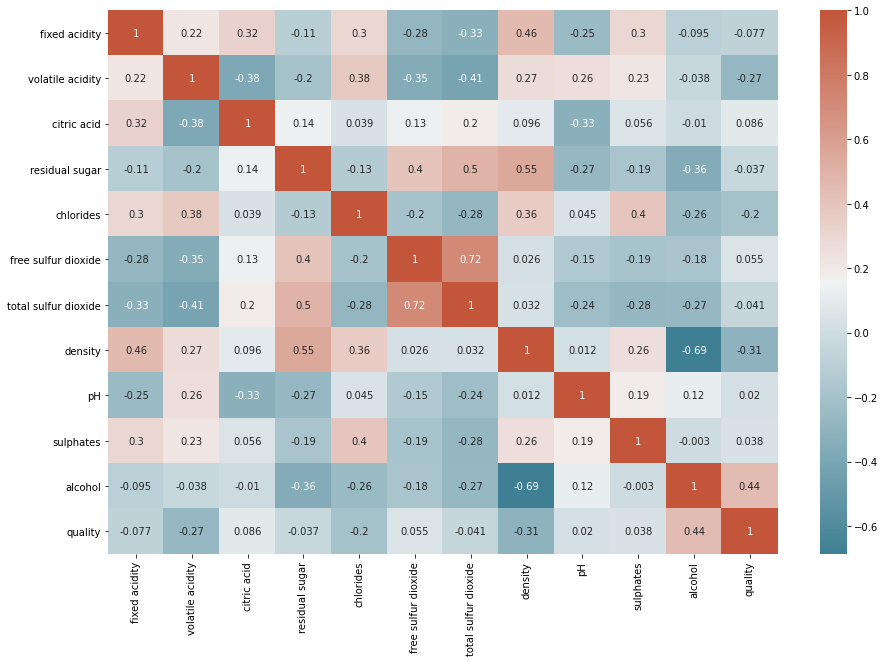

In [23]:
corr = df.corr()
matplotlib.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

### Convert to a Classification Problem
Going back to my objective, I wanted to compare the effectiveness of different classification techniques, so I needed to change the output variable to a binary output.
For this problem, I defined a bottle of wine as ‘good quality’ if it had a quality score of 7 or higher, and if it had a score of less than 7, it was deemed ‘bad quality’.
Once I converted the output variable to a binary output, I separated my feature variables (X) and the target variable (y) into separate dataframes.

In [24]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]

# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

## Proportion of Good vs Bad Wines
I wanted to make sure that there was a reasonable number of good quality wines. Based on the results below, it seemed like a fair enough number. In some applications, resampling may be required if the data was extremely imbalanced, but I assumed that it was okay for this purpose.

In [25]:
# See proportion of good vs bad wines
df['goodquality'].value_counts()

0    5220
1    1277
Name: goodquality, dtype: int64

### Preparing Data for Modelling
Standardizing Feature Variables
At this point, I felt that I was ready to prepare the data for modelling. The first thing that I did was standardize the data. Standardizing the data means that it will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1. It’s important to standardize your data in order to equalize the range of the data.
For example, imagine a dataset with two input features: height in millimeters and weight in pounds. Because the values of ‘height’ are much higher due to its measurement, a greater emphasis will automatically be placed on height than weight, creating a bias.

In [26]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

### Split data
Next I split the data into a training and test set so that I could cross-validate my models and determine their effectiveness.

In [27]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

## Now, comes the fun part!
Modelling
For this project, I wanted to compare five different machine learning models: decision trees, random forests, AdaBoost, Gradient Boost, and XGBoost. For the purpose of this project, I wanted to compare these models by their accuracy.
Model 1: Decision Tree
Image for post
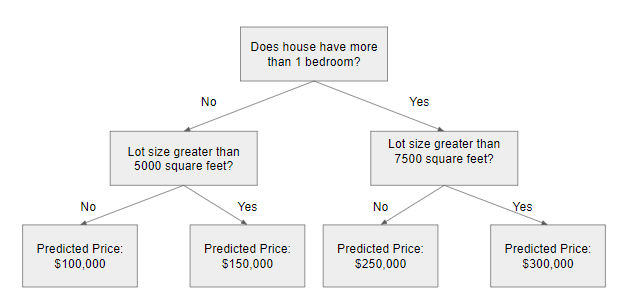



Decision trees are a popular model, used in operations research, strategic planning, and machine learning. Each square above is called a node, and the more nodes you have, the more accurate your decision tree will be (generally). The last nodes of the decision tree, where a decision is made, are called the leaves of the tree. Decision trees are intuitive and easy to build but fall short when it comes to accuracy.

In [28]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1301
           1       0.57      0.61      0.59       324

    accuracy                           0.83      1625
   macro avg       0.74      0.75      0.74      1625
weighted avg       0.84      0.83      0.83      1625



### Model 2: Random Forest
Random forests are an ensemble learning technique that builds off of decision trees. Random forests involve creating multiple decision trees using bootstrapped datasets of the original data and randomly selecting a subset of variables at each step of the decision tree. The model then selects the mode of all of the predictions of each decision tree. What’s the point of this? By relying on a “majority wins” model, it reduces the risk of error from an individual tree.

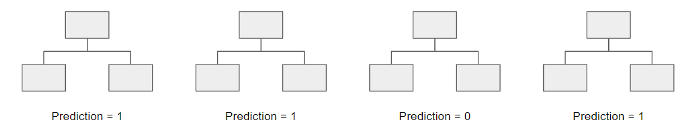

For example, if we created one decision tree, the third one, it would predict 0. But if we relied on the mode of all 4 decision trees, the predicted value would be 1. This is the power of random forests.

In [29]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1301
           1       0.81      0.55      0.66       324

    accuracy                           0.88      1625
   macro avg       0.85      0.76      0.79      1625
weighted avg       0.88      0.88      0.88      1625



### Model 3: AdaBoost
The next three models are boosting algorithms that take weak learners and turn them into strong ones. I don’t want to get sidetracked and explain the differences between the three because it’s quite complicated and intricate. That being said, I’ll leave some resources where you can learn about AdaBoost, Gradient Boosting, and XGBoosting.
1. StatQuest: AdaBoost
2. StatQuest: Gradient Boost
3. StatQuest: XGBoost

In [30]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1301
           1       0.59      0.39      0.47       324

    accuracy                           0.82      1625
   macro avg       0.72      0.66      0.68      1625
weighted avg       0.81      0.82      0.81      1625



### Model 4: Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1301
           1       0.68      0.41      0.52       324

    accuracy                           0.84      1625
   macro avg       0.78      0.68      0.71      1625
weighted avg       0.83      0.84      0.83      1625



## Model 5: XGBoost

In [32]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)

print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1301
           1       0.69      0.38      0.49       324

    accuracy                           0.84      1625
   macro avg       0.77      0.67      0.70      1625
weighted avg       0.83      0.84      0.82      1625



By comparing the five models, the random forest and XGBoost seems to yield the highest level of accuracy. However, since XGBoost has a better f1-score for predicting good quality wines (1), I’m concluding that the XGBoost is the winner of the five models.

### Feature Importance
Below, I graphed the feature importance based on the Random Forest model and the XGBoost model. While they slightly vary, the top 3 features are the same: alcohol, volatile acidity, and sulphates. If you look below the graphs, I split the dataset into good quality and bad quality to compare these variables in more detail.

### via Random Forest

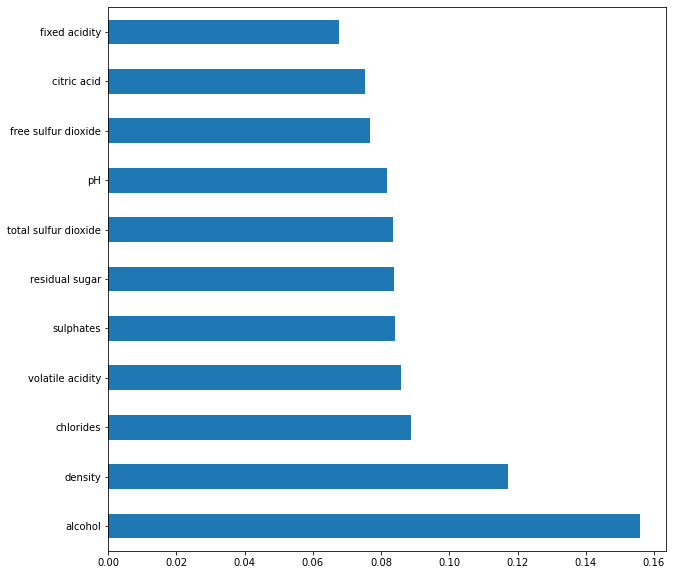

In [33]:
feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

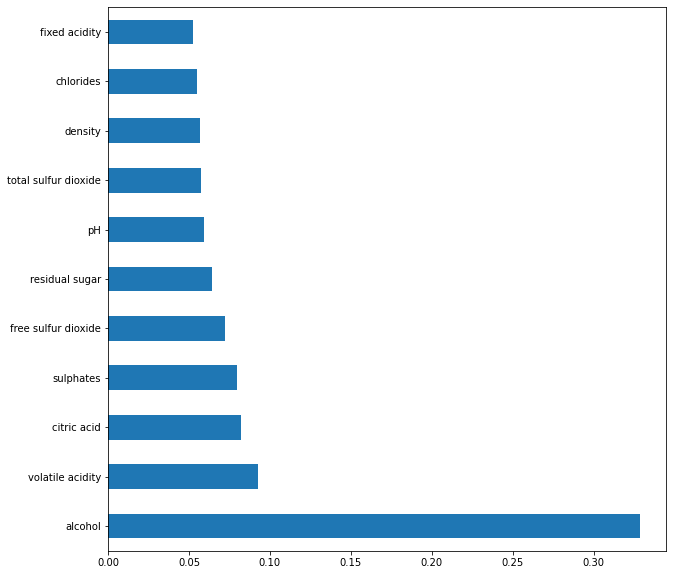

In [34]:
# Via XGBoost

feat_importances = pd.Series(model5.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [38]:
# Comparing the Top 4 Features
# Filtering df for only good quality
df_temp = df[df['goodquality']==1]
df_temp.describe()

# Filtering df for only bad quality
df_temp2 = df[df['goodquality']==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.0
mean,7.247011,0.352019,0.314720,5.593812,0.058837,30.395690,117.176533,0.995105,3.216262,0.528768,10.261462,5.490421,0.0
std,1.282968,0.172094,0.152466,4.901269,0.037145,18.288715,58.506354,0.002852,0.161135,0.145434,1.067408,0.605987,0.0
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987220,2.720000,0.230000,8.000000,3.000000,0.0
25%,6.400000,0.230000,0.240000,1.800000,0.040000,16.000000,74.000000,0.993000,3.110000,0.430000,9.400000,5.000000,0.0
50%,7.000000,0.300000,0.300000,3.000000,0.049000,28.000000,119.000000,0.995400,3.200000,0.510000,10.000000,6.000000,0.0
75%,7.700000,0.430000,0.400000,8.300000,0.069000,42.000000,160.000000,0.997200,3.320000,0.590000,11.000000,6.000000,0.0
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,6.000000,0.0


### By looking into the details, we can see that good quality wines have higher levels of alcohol on average, have a lower volatile acidity on average, higher levels of sulphates on average, and higher levels of residual sugar on average.